In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('bank-full.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data=df.copy()

In [37]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
for feat in data.columns:
    print(feat,len(data[data[feat].isnull()==True])/len(data))
        

age 0.0
job 0.0
marital 0.0
education 0.0
default 0.0
balance 0.0
housing 0.0
loan 0.0
contact 0.0
day 0.0
month 0.0
duration 0.0
campaign 0.0
pdays 0.0
previous 0.0
poutcome 0.0
Target 0.0


In [19]:
for feat in data.columns:
    print(feat,len(data[data[feat]=='unknown'])/len(data))

age 0.0
job 0.006370131162770122
marital 0.0
education 0.04107407489327818
default 0.0
balance 0.0
housing 0.0
loan 0.0
contact 0.28798301298356593
day 0.0
month 0.0
duration 0.0
campaign 0.0
pdays 0.0
previous 0.0
poutcome 0.8174780473778506
Target 0.0


In [5]:
non_num=[feat for feat in data.columns if df[feat].dtype=='O']
print(non_num)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


In [6]:
num=set(df.columns.to_list())-set(non_num)

In [7]:
print(num)                   

{'pdays', 'campaign', 'duration', 'day', 'previous', 'age', 'balance'}


In [14]:
for feat in num:
    print(feat,data[feat].unique())

pdays [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203
 221 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82
   6 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219
  24  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302
 323 318 333  60 326 335 313 312 305 325 327 

In [15]:
for feat in non_num:
    print(feat,data[feat].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
Target ['no' 'yes']


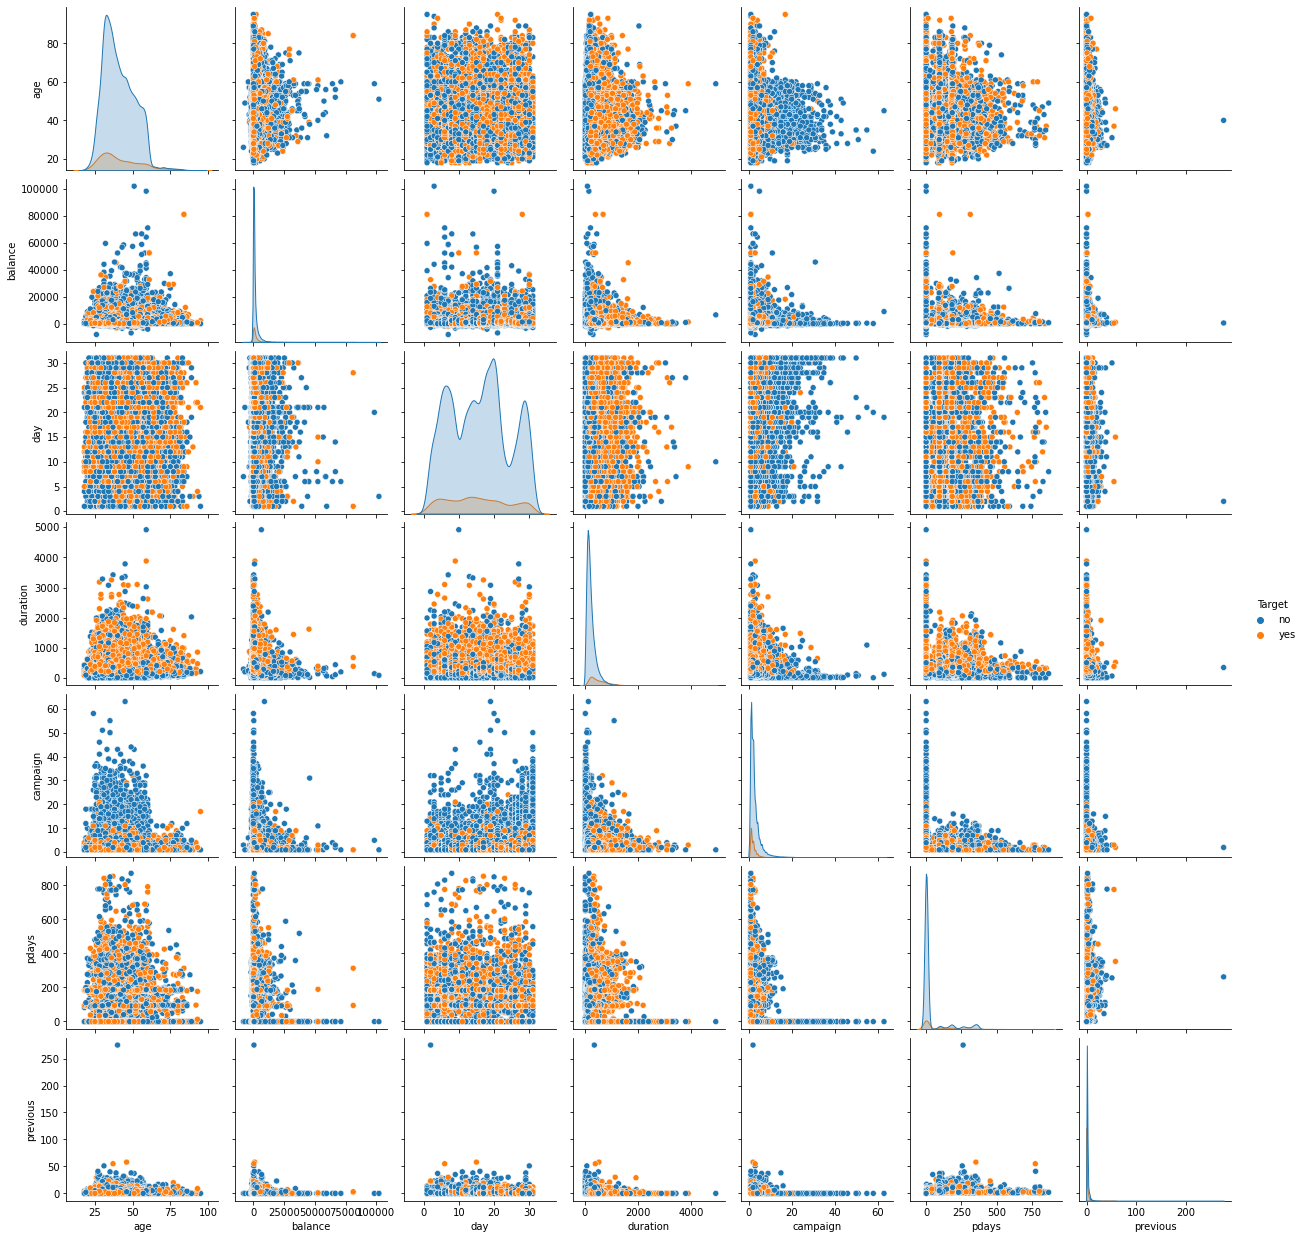

In [33]:
sns.pairplot(df,hue='Target')  #age and day are distibuted but balace, duration, campaign, pdays and previous are skewed to the left

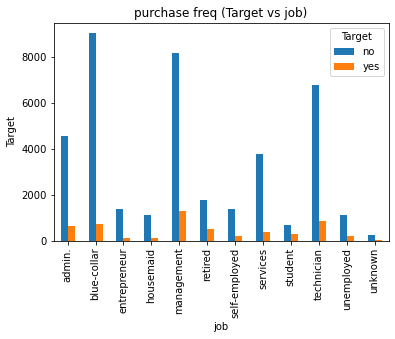

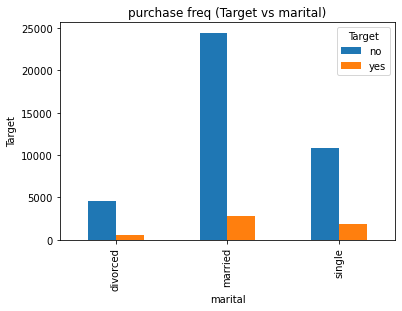

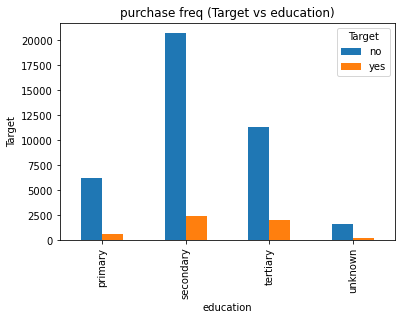

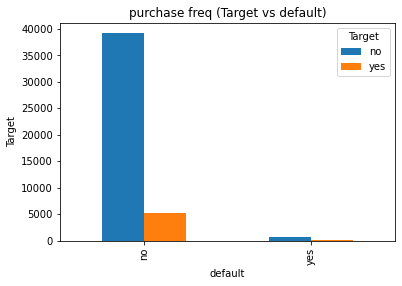

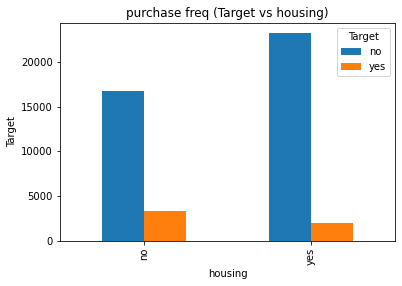

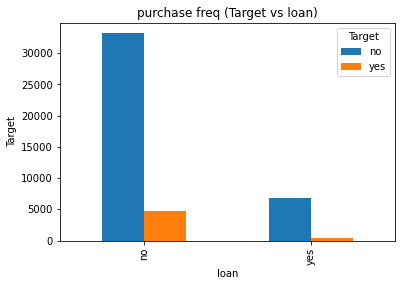

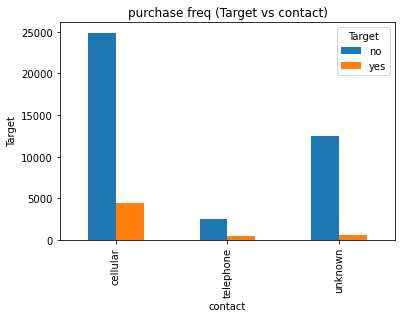

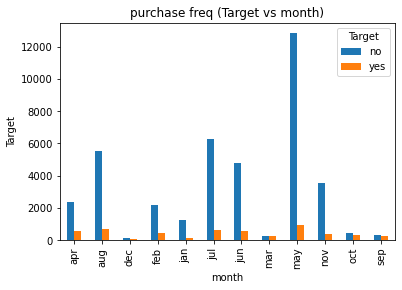

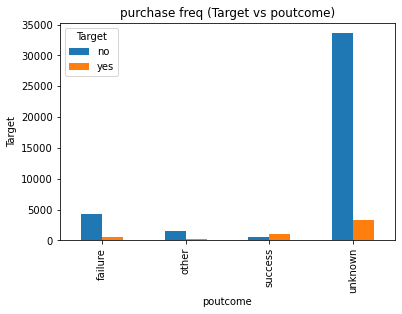

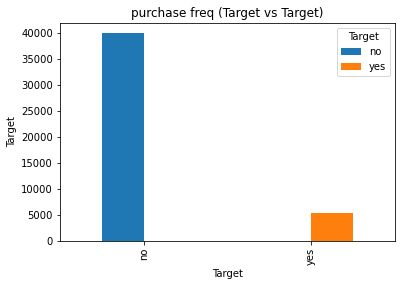

In [11]:
%matplotlib inline
for feat in non_num:
    pd.crosstab(data[feat],data['Target']).plot(kind='bar')
    plt.title("purchase freq (Target vs {})".format(feat))
    plt.xlabel(feat)
    plt.ylabel('Target')

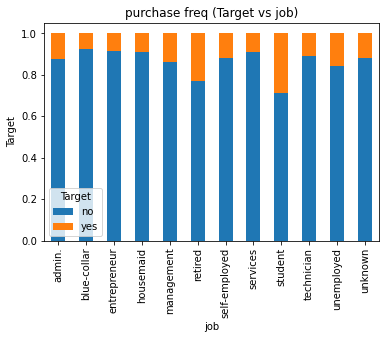

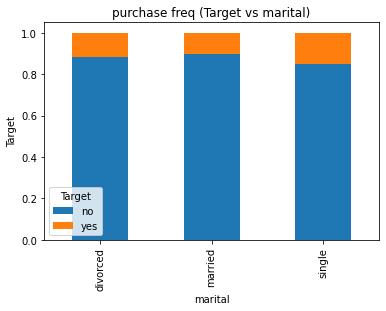

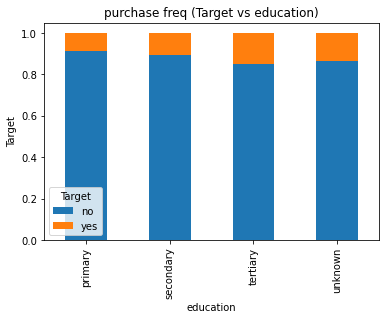

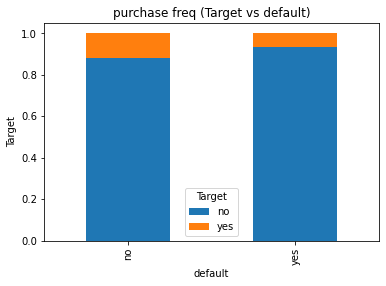

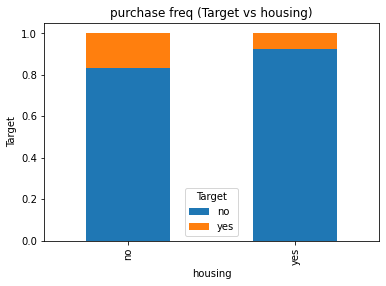

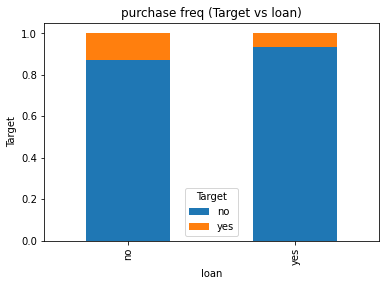

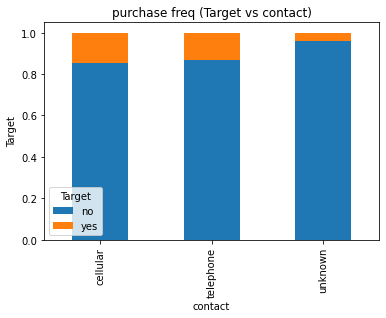

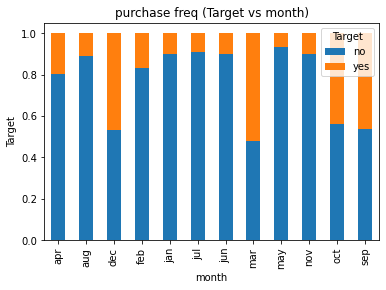

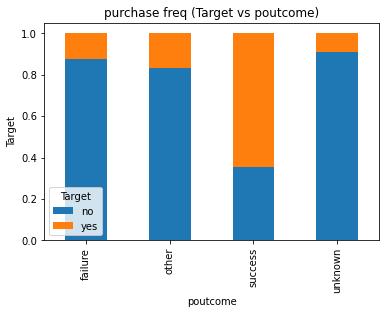

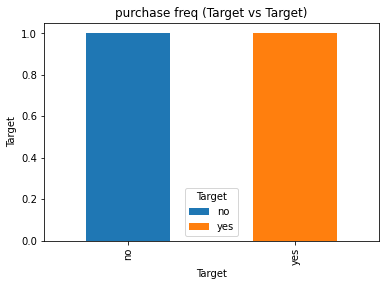

In [31]:
for feat in non_num:
    table=pd.crosstab(data[feat],data['Target'])
    table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
    plt.title("purchase freq (Target vs {})".format(feat))
    plt.xlabel(feat)
    plt.ylabel('Target')

In [15]:
for feat in non_num:
    print(feat)
    print(data.groupby(feat).mean())

job
                     age      balance        day    duration  campaign  \
job                                                                      
admin.         39.289886  1135.838909  15.564301  246.896732  2.575324   
blue-collar    40.044081  1078.826654  15.442561  262.901562  2.816995   
entrepreneur   42.190989  1521.470074  15.702085  256.309348  2.799597   
housemaid      46.415323  1392.395161  16.002419  245.825000  2.820968   
management     40.449567  1763.616832  16.114189  253.995771  2.864348   
retired        61.626767  1984.215106  15.439488  287.361307  2.346731   
self-employed  40.484484  1647.970868  16.027866  268.157061  2.853072   
services       38.740250   997.088108  15.635532  259.318729  2.718344   
student        26.542644  1388.060768  14.897655  246.656716  2.299574   
technician     39.314598  1252.632092  16.408582  252.904962  2.906805   
unemployed     40.961627  1521.745971  15.498081  288.543361  2.432080   
unknown        47.593750  1772.357

<AxesSubplot:ylabel='Frequency'>

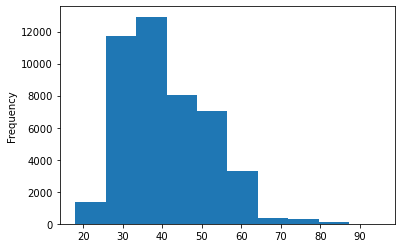

In [42]:
data['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

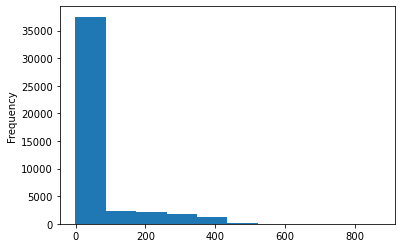

In [47]:
data['pdays'].plot.hist()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

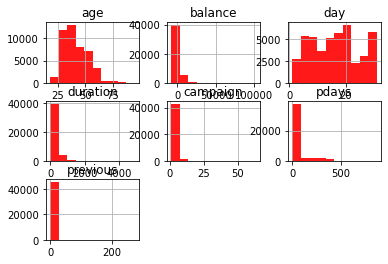

In [51]:
data.hist(color='#ff0000',alpha= 0.9)

<AxesSubplot:ylabel='Frequency'>

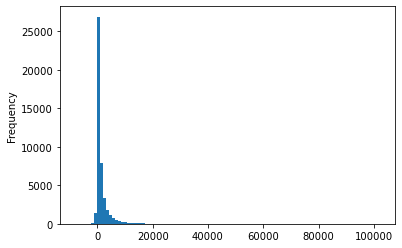

In [59]:
data['balance'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

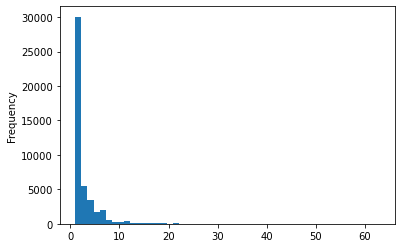

In [65]:
data['campaign'].plot.hist(bins=50)

<AxesSubplot:>

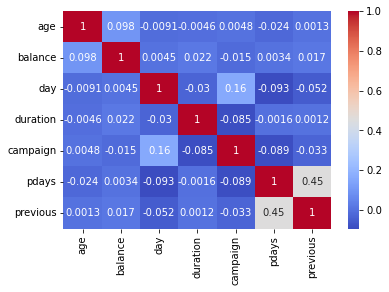

In [66]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [8]:
data=df.copy()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
#ranking the education
data['education']=data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,4])

In [11]:
#ranking the month
data['month']=data['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])

In [12]:
data['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [13]:
lst=data[data['month']==4].index.tolist()

In [14]:
df['month'].iloc[lst]

31459    apr
31460    apr
31461    apr
31462    apr
31463    apr
        ... 
43599    apr
43600    apr
43601    apr
43602    apr
43603    apr
Name: month, Length: 2932, dtype: object

In [48]:
print(non_num)   #we handled edu and month, job  has more than 10 subcategories, 
                 #we will take the top 10, others we will do the normal OHE

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


In [49]:
data.job.value_counts().sort_values(ascending=False).head(10)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
Name: job, dtype: int64

In [15]:
data['job']=data['job'].replace('unknown','unknownjob')

In [16]:
top10job=[x for x in data.job.value_counts().sort_values(ascending=False).head(10).index]

In [17]:
print(top10job)

['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid']


In [168]:
#top10month=[x for x in data.month.value_counts().sort_values(ascending=False).head(10).index]

In [183]:
#print(top10month)

In [18]:
for label in top10job:                                  #creating 10 dummy var
    data[label]=np.where(data['job']==label,1,0)

In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid
0,58,management,married,3,no,2143,yes,no,unknown,5,...,0,1,0,0,0,0,0,0,0,0
1,44,technician,single,2,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,4,no,1506,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,0
4,33,unknownjob,single,4,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


In [258]:
#pd.get_dummies(data['Target'],drop_first=True)

In [20]:
dumm=set(non_num)-set(['job','month','education'])
print(dumm)

{'loan', 'default', 'contact', 'Target', 'housing', 'marital', 'poutcome'}


In [21]:
for feat in dumm:
    print(feat,data[feat].unique())

loan ['no' 'yes']
default ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
Target ['no' 'yes']
housing ['yes' 'no']
marital ['married' 'single' 'divorced']
poutcome ['unknown' 'failure' 'other' 'success']


In [215]:
# for feat in dumm:
#     data[feat]=pd.get_dummies(data[feat],drop_first=True)

In [22]:
for feat in ['Target','loan','default','housing']:             #feat with 2 cat (yes and no)
    data[feat]=np.where(data[feat]=='yes',1,0)

In [23]:
for feat in dumm:
    data[feat]=data[feat].replace('unknown',('unknown_'+feat))

In [24]:
for feat in dumm:
    print(feat,data[feat].unique())

loan [0 1]
default [0 1]
contact ['unknown_contact' 'cellular' 'telephone']
Target [0 1]
housing [1 0]
marital ['married' 'single' 'divorced']
poutcome ['unknown_poutcome' 'failure' 'other' 'success']


In [25]:
for feat in ['poutcome','contact','marital']:                    #OHE of cat wd more that 2 subcat
    for label in data[feat].unique().tolist()[1:]:
        data[label]=np.where(data[feat]==label,1,0)
    

In [26]:
dumm

{'Target', 'contact', 'default', 'housing', 'loan', 'marital', 'poutcome'}

In [27]:
#now drop all columns except wd the ones that have 2 cat
data.drop(columns=set(non_num)-set(['Target','loan','default','housing']),inplace=True)

In [28]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,entrepreneur,unemployed,housemaid,failure,other,success,cellular,telephone,single,divorced
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
fft=set(data.columns.tolist())-set(['Target'])
print(fft)

{'retired', 'loan', 'services', 'cellular', 'admin.', 'entrepreneur', 'unemployed', 'day', 'previous', 'age', 'technician', 'single', 'housing', 'housemaid', 'other', 'default', 'blue-collar', 'management', 'pdays', 'campaign', 'duration', 'self-employed', 'success', 'divorced', 'telephone', 'balance', 'failure'}


<AxesSubplot:>

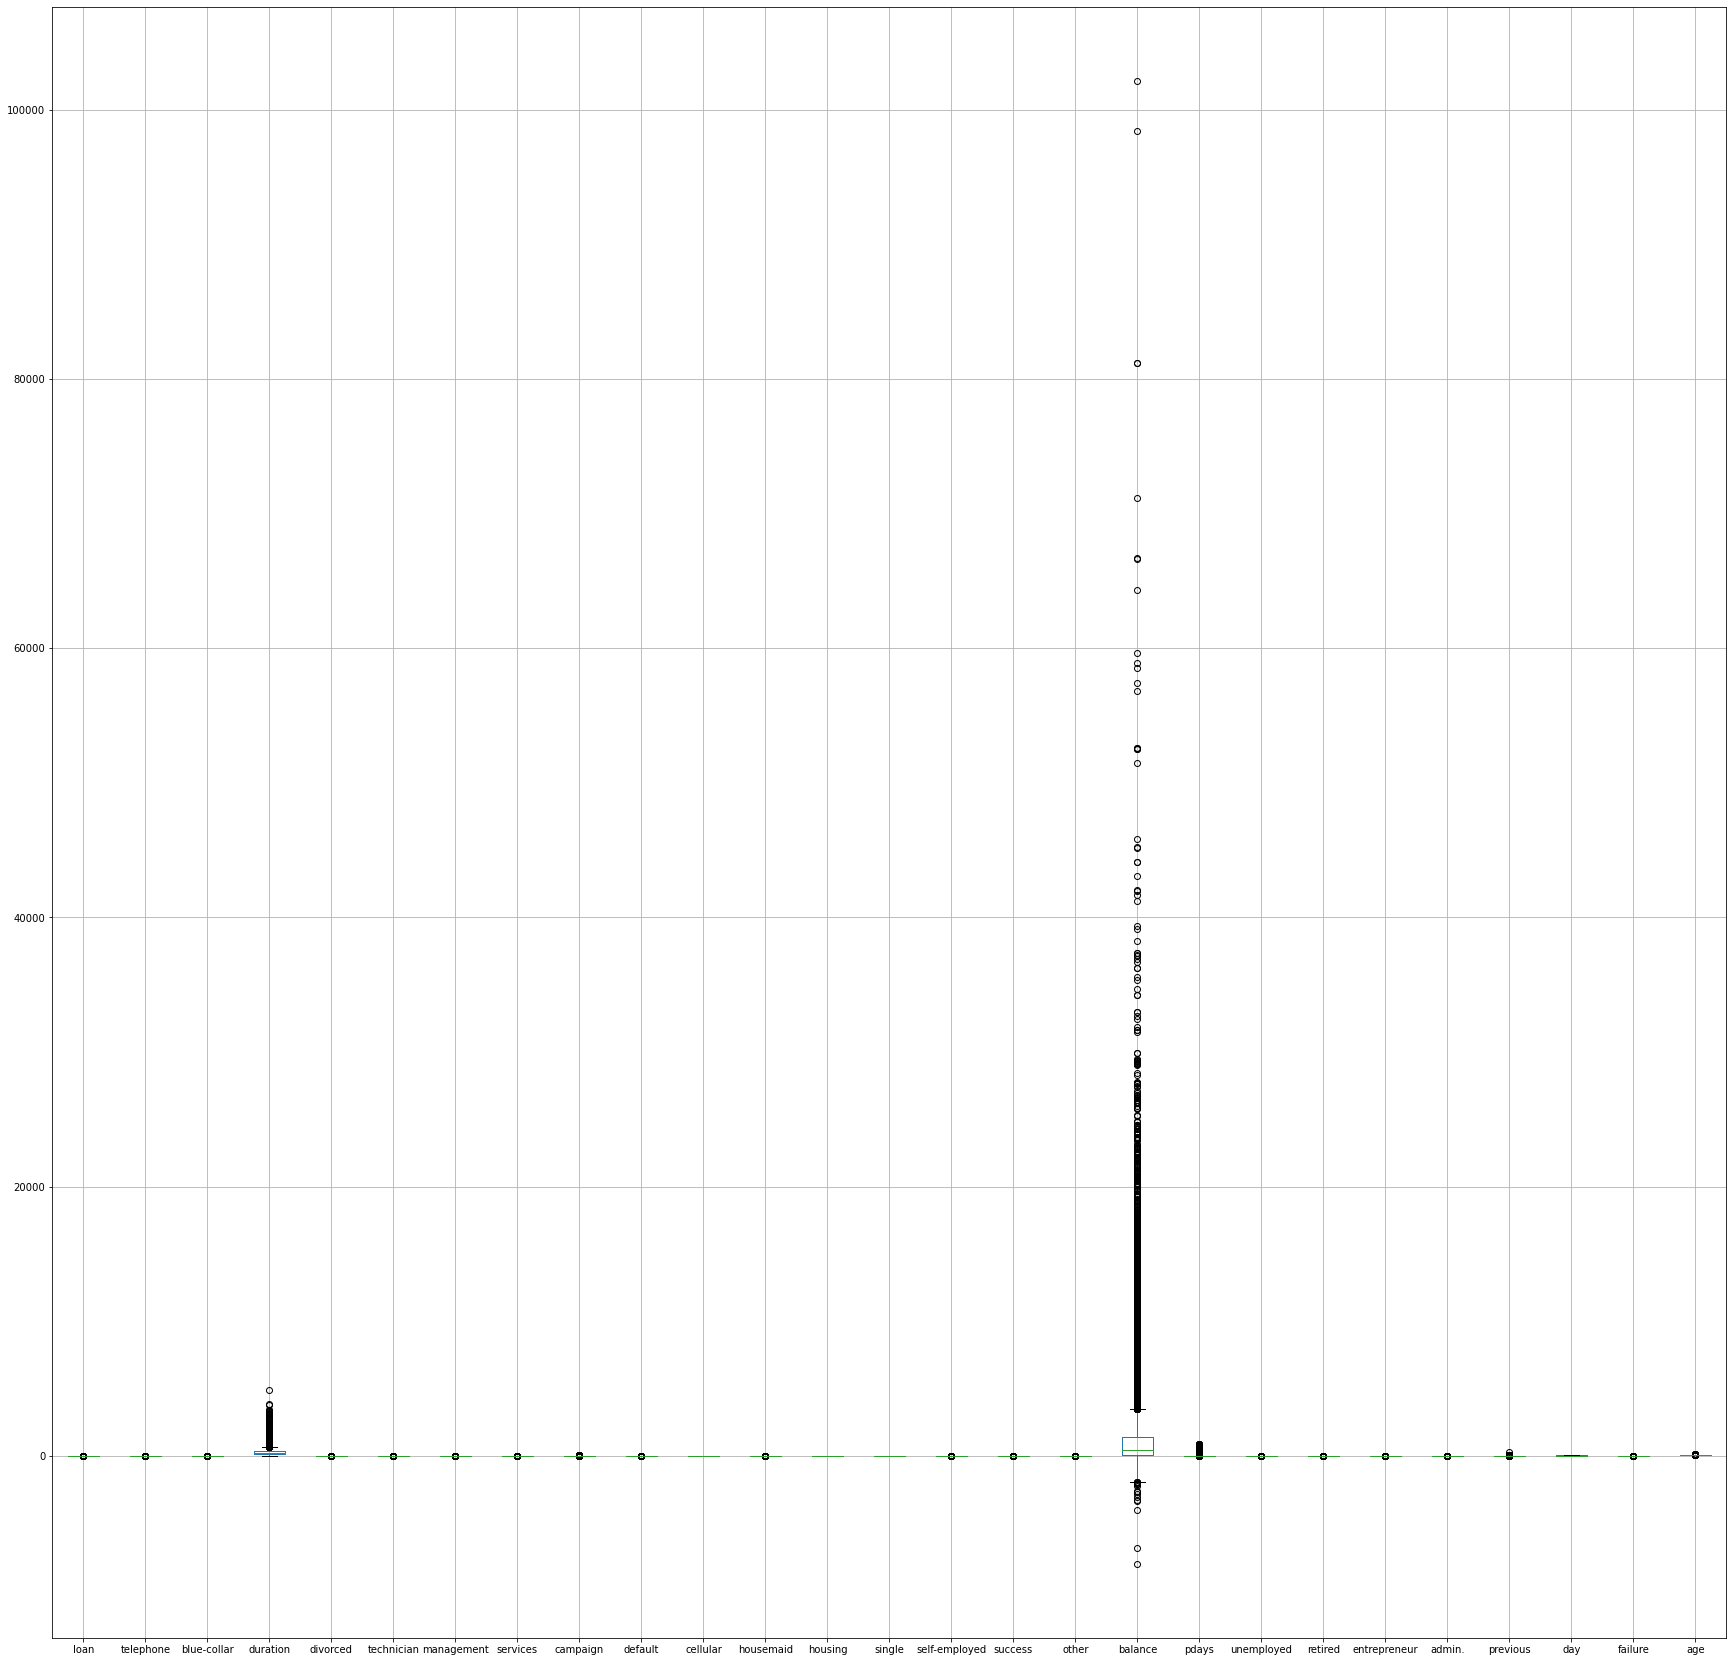

In [517]:
x.boxplot(figsize=(30,30))

In [62]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,...,0.215257,0.209197,0.168034,0.114375,0.09188,0.050076,0.034925,0.032890,0.028820,0.027427
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,...,0.411005,0.406740,0.373901,0.318269,0.28886,0.218105,0.183592,0.178351,0.167303,0.163326
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Handling outliers

In [31]:
#for dist close to guassian dist
upperboundary=data['age'].mean() + 3*df['age'].std()
lowerboundary=data['age'].mean() - 3*df['age'].std()
print(upperboundary),print(lowerboundary),print(df['age'].mean())

72.79249633725466
9.079924091402077
40.93621021432837


(None, None, None)

In [32]:
IQR=df.age.quantile(0.75)-df.age.quantile(0.25)  #in normal dist we are sure that quantile of 0.25 and 0.75 will work,
          #but in case of skewed data set we have to check and might have to try diff combinations

In [33]:
IQR

15.0

In [34]:
lower_bridge=df['age'].quantile(0.25)-(IQR*1.5)     
upper_bridge=df['age'].quantile(0.75)+(IQR*1.5)          
print(lower_bridge),print(upper_bridge)

10.5
70.5


(None, None)

In [35]:
#extreme outliers

lowest_bridge=df['age'].quantile(0.25)-(IQR*3)      
top_bridge=df['age'].quantile(0.75)+(IQR*3)          
print(lower_bridge),print(top_bridge)

10.5
93.0


(None, None)

In [36]:
data2=data.copy()
data2['age'][data[data2['age']>93].index]=93

In [37]:
data2[data2['age']>93].index

Int64Index([], dtype='int64')

In [3]:
#day
upperboundary=data['day'].mean() + 3*df['day'].std()
lowerboundary=data['day'].mean() - 3*df['day'].std()
print(upperboundary),print(lowerboundary),print(df['day'].mean())

In [39]:
IQR=data.day.quantile(0.75)-data.day.quantile(0.25)
IQR

13.0

In [40]:
lowest_bridge=df['day'].quantile(0.25)-(IQR*3)         
top_bridge=df['day'].quantile(0.75)+(IQR*3)         
print(lower_bridge),print(top_bridge)

10.5
60.0


(None, None)

In [41]:
data['day'][data[data['day']<10].index]=10

In [42]:
#for skewed data

In [43]:
#balance
upperboundary=data['balance'].mean() + 3*df['balance'].std()
lowerboundary=data['balance'].mean() - 3*df['balance'].std()
print(upperboundary),print(lowerboundary),print(df['balance'].mean())

10496.569545190878
-7772.025429820724
1362.2720576850766


(None, None, None)

In [44]:
IQR=data.balance.quantile(0.60)-data.balance.quantile(0.25)
IQR

629.0

In [45]:
lowest_bridge=df['balance'].quantile(0.25)-(IQR*3)          #q1
top_bridge=df['balance'].quantile(0.60)+(IQR*3)          #q4
print(lower_bridge),print(top_bridge)

10.5
2588.0


(None, None)

In [46]:
data['balance'][data[data['balance']<10].index]=10
data['balance'][data[data['balance']>2588].index]=2588

In [47]:
#data.boxplot(figsize=(30,30))

In [48]:
#duration 

upperboundary=data['duration'].mean() + 3*df['duration'].std()
lowerboundary=data['duration'].mean() - 3*df['duration'].std()
print(upperboundary),print(lowerboundary),print(df['duration'].mean())

1030.746516576982
-514.4203570140437
258.1630797814691


(None, None, None)

In [49]:
IQR=data.duration.quantile(0.60)-data.duration.quantile(0.25)
IQR

120.0

In [50]:
lowest_bridge=df['duration'].quantile(0.25)-(IQR*3)          #q1
top_bridge=df['duration'].quantile(0.60)+(IQR*3)          #q4
print(lower_bridge),print(top_bridge)

10.5
583.0


(None, None)

In [51]:
data['duration'][data[data['duration']<10.5].index]=10.5
data['duration'][data[data['duration']>583].index]=583

/tmp/ipykernel_4962/2574642074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'][data[data['duration']>583].index]=583


In [52]:
#data.boxplot(figsize=(30,30))

In [53]:
#pdays

upperboundary=data['pdays'].mean() + 3*df['pdays'].std()
lowerboundary=data['pdays'].mean() - 3*df['pdays'].std()
print(upperboundary),print(lowerboundary),print(df['pdays'].mean())

340.5840659340357
-260.18841000959253
40.19782796222158


(None, None, None)

In [54]:
IQR=data.pdays.quantile(0.80)-data.pdays.quantile(0.25)
IQR

0.0

In [55]:
lowest_bridge=df['pdays'].quantile(0.25)-(IQR*3)          #q1
top_bridge=df['pdays'].quantile(0.82)+(IQR*3)          #q4
print(lowest_bridge),print(top_bridge)

-1.0
9.0


(None, None)

In [56]:
#datat=data.copy()
data['pdays'][data[data['pdays']<-1].index]=-1
data['pdays'][data[data['pdays']>9].index]=9

/tmp/ipykernel_4962/156477383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pdays'][data[data['pdays']<-1].index]=-1
/tmp/ipykernel_4962/156477383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pdays'][data[data['pdays']>9].index]=9


In [57]:
#datat.boxplot(figsize=(30,30))

In [58]:
#campaign

upperboundary=data['campaign'].mean() + 3*df['campaign'].std()
lowerboundary=data['campaign'].mean() - 3*df['campaign'].std()
print(upperboundary),print(lowerboundary),print(df['campaign'].mean())

12.057903308087548
-6.530221991593775
2.763840658246887


(None, None, None)

In [59]:
IQR=df.campaign.quantile(0.60)-df.campaign.quantile(0.20)
IQR

1.0

In [60]:
lowest_bridge=df['campaign'].quantile(0.20)-(IQR*1.5)          #q2
top_bridge=df['campaign'].quantile(0.60)+(IQR*1.5)          #q3
print(lowest_bridge),print(top_bridge)

-0.5
3.5


(None, None)

In [61]:
data=data.copy()
data['campaign'][data[data['campaign']<0].index]=0
data['campaign'][data[data['campaign']>3.5].index]=3.5

/tmp/ipykernel_4962/3244082666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['campaign'][data[data['campaign']<0].index]=0
/tmp/ipykernel_4962/3244082666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['campaign'][data[data['campaign']>3.5].index]=3.5


In [62]:
#data.boxplot(figsize=(30,30))

In [63]:
#previous - no of contacts performed before this client

In [64]:
upperboundary=data['previous'].mean() + 3*df['previous'].std()
lowerboundary=data['previous'].mean() - 3*df['previous'].std()
print(upperboundary),print(lowerboundary),print(df['previous'].mean())

7.490646507424825
-6.329999762163715
0.5803233726305546


(None, None, None)

In [65]:
IQR=data.previous.quantile(0.80)-data.previous.quantile(0.10)
IQR

0.0

In [66]:
lowest_bridge=data['previous'].quantile(0.10)-(IQR*1.5)          #q1
top_bridge=data['previous'].quantile(0.87)+(IQR*1.5)          #q4
print(lowest_bridge),print(top_bridge)

0.0
1.0


(None, None)

In [67]:
data=data.copy()
data['previous'][data[data['previous']<0].index]=0
data['previous'][data[data['previous']>1].index]=1

/tmp/ipykernel_4962/517996151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['previous'][data[data['previous']<0].index]=0
/tmp/ipykernel_4962/517996151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['previous'][data[data['previous']>1].index]=1


In [68]:
#data.boxplot(figsize=(30,30))

In [69]:
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,entrepreneur,unemployed,housemaid,failure,other,success,cellular,telephone,single,divorced
0,58,0,2143,1,0,10,261.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,10,151.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,1,0
2,33,0,10,1,1,10,76.0,1.0,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,10,92.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,10,0,0,10,198.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,583.0,3.0,-1,0,...,0,0,0,0,0,0,1,0,0,0
45207,71,0,1729,0,0,17,456.0,2.0,-1,0,...,0,0,0,0,0,0,1,0,0,1
45208,72,0,2588,0,0,17,583.0,3.5,9,1,...,0,0,0,0,0,1,1,0,0,0
45209,57,0,668,0,0,17,508.0,3.5,-1,0,...,0,0,0,0,0,0,0,1,0,0


# Feature selection

In [70]:
ds=data.copy()

In [111]:
ds

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid
0,58,0,2143,1,0,10,261.0,1.0,-1,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,10,151.0,1.0,-1,0,...,0,0,1,0,0,0,0,0,0,0
2,33,0,10,1,1,10,76.0,1.0,-1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,10,92.0,1.0,-1,0,...,1,0,0,0,0,0,0,0,0,0
4,33,0,10,0,0,10,198.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,583.0,3.0,-1,0,...,0,0,1,0,0,0,0,0,0,0
45207,71,0,1729,0,0,17,456.0,2.0,-1,0,...,0,0,0,0,0,1,0,0,0,0
45208,72,0,2588,0,0,17,583.0,3.5,9,1,...,0,0,0,0,0,1,0,0,0,0
45209,57,0,668,0,0,17,508.0,3.5,-1,0,...,1,0,0,0,0,0,0,0,0,0


In [106]:
fft=set(ds.columns.tolist())-set(['Target'])
print(fft)
x=ds[fft]
x

{'retired', 'loan', 'services', 'cellular', 'admin.', 'entrepreneur', 'unemployed', 'day', 'previous', 'age', 'technician', 'single', 'housing', 'housemaid', 'other', 'default', 'blue-collar', 'management', 'pdays', 'campaign', 'duration', 'self-employed', 'success', 'divorced', 'telephone', 'balance', 'failure'}


/tmp/ipykernel_4962/3293518136.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x=ds[fft]


,retired,loan,services,cellular,admin.,entrepreneur,unemployed,day,previous,age,...,management,pdays,campaign,duration,self-employed,success,divorced,telephone,balance,failure
0,0,0,0,0,0,0,0,10,0,58,...,1,-1,1.0,261.0,0,0,0,0,2143,0
1,0,0,0,0,0,0,0,10,0,44,...,0,-1,1.0,151.0,0,0,0,0,29,0
2,0,1,0,0,0,1,0,10,0,33,...,0,-1,1.0,76.0,0,0,0,0,10,0
3,0,0,0,0,0,0,0,10,0,47,...,0,-1,1.0,92.0,0,0,0,0,1506,0
4,0,0,0,0,0,0,0,10,0,33,...,0,-1,1.0,198.0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,1,0,0,0,17,0,51,...,0,-1,3.0,583.0,0,0,0,0,825,0
45207,1,0,0,1,0,0,0,17,0,71,...,0,-1,2.0,456.0,0,0,1,0,1729,0
45208,1,0,0,1,0,0,0,17,1,72,...,0,9,3.5,583.0,0,1,0,0,2588,0
45209,0,0,0,0,0,0,0,17,0,57,...,0,-1,3.5,508.0,0,0,0,1,668,0


In [95]:
y=ds.Target

In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

rfe= RFE(lr,20)

rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

/home/o2bhai/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/o2bhai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/o2bhai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

[ True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True False False False  True  True False
  True False  True]
[1 1 1 1 1 1 1 5 1 6 1 1 1 1 1 1 1 1 4 2 7 1 1 3 1 8 1]


In [113]:
len(x.columns)
x.columns

Index(['retired', 'loan', 'services', 'cellular', 'admin.', 'entrepreneur',
       'unemployed', 'day', 'previous', 'age', 'technician', 'single',
       'housing', 'housemaid', 'other', 'default', 'blue-collar', 'management',
       'pdays', 'campaign', 'duration', 'self-employed', 'success', 'divorced',
       'telephone', 'balance', 'failure'],
      dtype='object')

In [120]:
fsc=set(x.columns.tolist())-set(['age','management','day','duration','campaign','divorced','balance'])

In [258]:
#age, management, day,duration, campaign, divorce, balance

In [121]:
print(len(fsc))    #selected features 
print(fsc)

20
{'entrepreneur', 'admin.', 'housing', 'default', 'telephone', 'cellular', 'loan', 'services', 'unemployed', 'previous', 'technician', 'housemaid', 'other', 'blue-collar', 'pdays', 'self-employed', 'success', 'single', 'retired', 'failure'}


# Buiding the Logistic regression model

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state = 355)

In [128]:
log_reg = LogisticRegression()
log_reg.fit(x,y)

/home/o2bhai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
y_pred = log_reg.predict(x_test)

In [130]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8860479518711847

In [131]:
log_reg.fit(x_train,y_train)

/home/o2bhai/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[9650,  343],
       [ 945,  365]])

In [133]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(Accuracy)

Precision = true_positive/(true_positive+false_positive)
print(Precision)

Recall = true_positive/(true_positive+false_negative)
print(Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print(F1_Score)

auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8860479518711847
0.9656759731812269
0.9108069844266163
0.9374392850204002
0.62215096368985


# roc curve

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

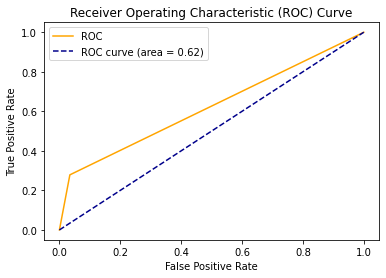

In [135]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()